In [5]:
import os
import sys
import csv
from file_utils import *
import re

In [6]:
list_files = []
iemocap_full_release_path = "/home/mandeep_stanford/cs231n_project/IEMOCAP_full_release/"

iemocap_pre_processed_data_path = "/home/mandeep_stanford/cs231n_project/code/pre-processed_data/noise_removing/"

for x in range(5):
    sess_name = "Session" + str(x+1)
    print(sess_name)
    path = iemocap_full_release_path + sess_name + "/sentences/wav/"
    print(path)
    #file_search(path, list_files)
    #list_files = sorted(list_files)

    # print sess_name + ", #sum files: " + str(len(list_files))

Session1
/home/mandeep_stanford/cs231n_project/IEMOCAP_full_release/Session1/sentences/wav/
Session2
/home/mandeep_stanford/cs231n_project/IEMOCAP_full_release/Session2/sentences/wav/
Session3
/home/mandeep_stanford/cs231n_project/IEMOCAP_full_release/Session3/sentences/wav/
Session4
/home/mandeep_stanford/cs231n_project/IEMOCAP_full_release/Session4/sentences/wav/
Session5
/home/mandeep_stanford/cs231n_project/IEMOCAP_full_release/Session5/sentences/wav/


In [7]:
useful_regex = re.compile(r'\[.+\]\n', re.IGNORECASE)


In [8]:
file_path = iemocap_full_release_path + '/Session1/dialog/EmoEvaluation/Ses01F_impro01.txt'

In [9]:
with open(file_path) as f:
    file_content = f.read()
    
info_lines = re.findall(useful_regex, file_content)

In [10]:
for l in info_lines[1:10]:
    print(l.strip().split('\t'))

['[6.2901 - 8.2357]', 'Ses01F_impro01_F000', 'neu', '[2.5000, 2.5000, 2.5000]']
['[10.0100 - 11.3925]', 'Ses01F_impro01_F001', 'neu', '[2.5000, 2.5000, 2.5000]']
['[14.8872 - 18.0175]', 'Ses01F_impro01_F002', 'neu', '[2.5000, 2.5000, 2.5000]']
['[19.2900 - 20.7875]', 'Ses01F_impro01_F003', 'xxx', '[2.5000, 3.0000, 3.0000]']
['[21.3257 - 24.7400]', 'Ses01F_impro01_F004', 'xxx', '[2.5000, 3.0000, 2.5000]']
['[27.4600 - 31.4900]', 'Ses01F_impro01_F005', 'neu', '[2.5000, 3.5000, 2.0000]']
['[38.9650 - 43.5900]', 'Ses01F_impro01_F006', 'fru', '[2.0000, 3.5000, 3.5000]']
['[46.5800 - 52.1900]', 'Ses01F_impro01_F007', 'fru', '[2.5000, 3.5000, 3.5000]']
['[56.1600 - 58.8225]', 'Ses01F_impro01_F008', 'fru', '[2.0000, 3.5000, 3.5000]']


In [11]:
info_line = re.compile(r'\[.+\]\n', re.IGNORECASE)

start_times, end_times, wav_file_names, emotions, vals, acts, doms = [], [], [], [], [], [], []
import pdb
for sess in range(1, 5):
    emo_evaluation_dir = iemocap_full_release_path + '/Session{}/dialog/EmoEvaluation/'.format(sess)
    evaluation_files = [l for l in os.listdir(emo_evaluation_dir) if 'Ses' in l]
    for file in evaluation_files:
        #
        #
        x = re.search("^Ses.*", file)
        #print(x, file)
        #pdb.set_trace()
        if x == None:
            continue
        with open(emo_evaluation_dir + file) as f:
            content = f.read()
        info_lines = re.findall(info_line, content)
        for line in info_lines[1:]:  # the first line is a header
            #pdb.set_trace()   
            start_end_time, wav_file_name, emotion, val_act_dom = line.strip().split('\t')
            start_time, end_time = start_end_time[1:-1].split('-')
            val, act, dom = val_act_dom[1:-1].split(',')
            val, act, dom = float(val), float(act), float(dom)
            start_time, end_time = float(start_time), float(end_time)
            start_times.append(start_time)
            end_times.append(end_time)
            wav_file_names.append(wav_file_name)
            emotions.append(emotion)
            vals.append(val)
            acts.append(act)
            doms.append(dom)

In [12]:
import pandas as pd

df_iemocap = pd.DataFrame(columns=['start_time', 'end_time', 'wav_file', 'emotion', 'val', 'act', 'dom'])

df_iemocap['start_time'] = start_times
df_iemocap['end_time'] = end_times
df_iemocap['wav_file'] = wav_file_names
df_iemocap['emotion'] = emotions
df_iemocap['val'] = vals
df_iemocap['act'] = acts
df_iemocap['dom'] = doms

df_iemocap.tail()

,start_time,end_time,wav_file,emotion,val,act,dom
7864,139.08,141.80,Ses04F_impro01_M021,ang,2.0,4.0,4.5
7865,145.26,148.57,Ses04F_impro01_M022,fru,1.5,4.0,4.5
7866,148.69,151.21,Ses04F_impro01_M023,ang,1.5,4.5,5.0
7867,151.22,155.47,Ses04F_impro01_M024,ang,1.0,4.5,5.0
7868,165.43,168.51,Ses04F_impro01_M025,xxx,2.0,3.0,3.5


In [13]:
df_iemocap.to_csv(iemocap_pre_processed_data_path + '/df_iemocap.csv', index=False)

In [14]:
print("Extracting Audio Vectors now")

Extracting Audio Vectors now


In [15]:
#import sys
#!{sys.executable} -m pip install librosa
#!{sys.executable} -m pip install pysoundfile

#you may have to execute this in unix terminal to instal sndfile.h
#sudo apt-get install libsndfile1

In [16]:
import librosa
import os
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
from tqdm import tqdm
import pickle

import IPython.display
import librosa.display
ms.use('seaborn-muted')
%matplotlib inline

In [17]:
file_path = iemocap_full_release_path + "/Session1/dialog/wav/Ses01F_impro01.wav"

y, sr = librosa.load(file_path, sr=44100)
y, sr

(array([ 0.42572615,  0.48587543,  0.37312022, ..., -0.31514615,
        -0.16263676,  0.        ], dtype=float32), 44100)

In [18]:
import pandas as pd
import math

labels_df = pd.read_csv(iemocap_pre_processed_data_path + "/df_iemocap.csv")
iemocap_dir = iemocap_full_release_path

In [19]:
print("loop thru wav audio files and dump audio vector into pkl format")

loop thru wav audio files and dump audio vector into pkl format


In [20]:
labels_df

,start_time,end_time,wav_file,emotion,val,act,dom
0,5.3913,8.2350,Ses01M_script01_2_F000,ang,2.5,2.5,3.0
1,12.7400,17.2800,Ses01M_script01_2_F001,ang,2.5,2.0,3.0
2,32.6300,35.3425,Ses01M_script01_2_F002,xxx,2.5,2.5,3.0
3,36.7600,39.4800,Ses01M_script01_2_F003,xxx,2.5,3.0,4.0
4,41.1800,44.7000,Ses01M_script01_2_F004,ang,1.5,4.0,4.0
...,...,...,...,...,...,...,...
7864,139.0800,141.8000,Ses04F_impro01_M021,ang,2.0,4.0,4.5
7865,145.2600,148.5700,Ses04F_impro01_M022,fru,1.5,4.0,4.5
7866,148.6900,151.2100,Ses04F_impro01_M023,ang,1.5,4.5,5.0
7867,151.2200,155.4700,Ses04F_impro01_M024,ang,1.0,4.5,5.0


In [149]:
def fftnoise(f):
    f = np.array(f, dtype="complex")
    Np = (len(f) - 1) // 2
    phases = np.random.rand(Np) * 2 * np.pi
    phases = np.cos(phases) + 1j * np.sin(phases)
    f[1 : Np + 1] *= phases
    f[-1 : -1 - Np : -1] = np.conj(f[1 : Np + 1])
    return np.fft.ifft(f).real


def band_limited_noise(min_freq, max_freq, samples=1024, samplerate=1):
    freqs = np.abs(np.fft.fftfreq(samples, 1 / samplerate))
    f = np.zeros(samples)
    f[np.logical_and(freqs >= min_freq, freqs <= max_freq)] = 1
    return fftnoise(f)


import time
from datetime import timedelta as td


def _stft(y, n_fft, hop_length, win_length):
    return librosa.stft(y=y, n_fft=n_fft, hop_length=hop_length, win_length=win_length)


def _istft(y, hop_length, win_length):
    return librosa.istft(y, hop_length, win_length)


def _amp_to_db(x):
    return librosa.core.amplitude_to_db(x, ref=1.0, amin=1e-20, top_db=80.0)


def _db_to_amp(x,):
    return librosa.core.db_to_amplitude(x, ref=1.0)


def plot_spectrogram(signal, title):
    fig, ax = plt.subplots(figsize=(20, 4))
    cax = ax.matshow(
        signal,
        origin="lower",
        aspect="auto",
        cmap=plt.cm.seismic,
        vmin=-1 * np.max(np.abs(signal)),
        vmax=np.max(np.abs(signal)),
    )
    fig.colorbar(cax)
    ax.set_title(title)
    plt.tight_layout()
    plt.show()


def plot_statistics_and_filter(
    mean_freq_noise, std_freq_noise, noise_thresh, smoothing_filter
):
    fig, ax = plt.subplots(ncols=2, figsize=(20, 4))
    plt_mean, = ax[0].plot(mean_freq_noise, label="Mean power of noise")
    plt_std, = ax[0].plot(std_freq_noise, label="Std. power of noise")
    plt_std, = ax[0].plot(noise_thresh, label="Noise threshold (by frequency)")
    ax[0].set_title("Threshold for mask")
    ax[0].legend()
    cax = ax[1].matshow(smoothing_filter, origin="lower")
    fig.colorbar(cax)
    ax[1].set_title("Filter for smoothing Mask")
    plt.show()


def removeNoise(
    audio_clip,
    noise_clip,
    n_grad_freq=2,
    n_grad_time=4,
    n_fft=2048,
    win_length=2048,
    hop_length=512,
    n_std_thresh=1.5,
    prop_decrease=1.0,
    verbose=False,
    visual=False,
):
    """Remove noise from audio based upon a clip containing only noise

    Args:
        audio_clip (array): The first parameter.
        noise_clip (array): The second parameter.
        n_grad_freq (int): how many frequency channels to smooth over with the mask.
        n_grad_time (int): how many time channels to smooth over with the mask.
        n_fft (int): number audio of frames between STFT columns.
        win_length (int): Each frame of audio is windowed by `window()`. The window will be of length `win_length` and then padded with zeros to match `n_fft`..
        hop_length (int):number audio of frames between STFT columns.
        n_std_thresh (int): how many standard deviations louder than the mean dB of the noise (at each frequency level) to be considered signal
        prop_decrease (float): To what extent should you decrease noise (1 = all, 0 = none)
        visual (bool): Whether to plot the steps of the algorithm

    Returns:
        array: The recovered signal with noise subtracted

    """
    if verbose:
        start = time.time()
    # STFT over noise
    noise_stft = _stft(noise_clip, n_fft, hop_length, win_length)
    noise_stft_db = _amp_to_db(np.abs(noise_stft))  # convert to dB
    # Calculate statistics over noise
    mean_freq_noise = np.mean(noise_stft_db, axis=1)
    std_freq_noise = np.std(noise_stft_db, axis=1)
    noise_thresh = mean_freq_noise + std_freq_noise * n_std_thresh
    if verbose:
        print("STFT on noise:", td(seconds=time.time() - start))
        start = time.time()
    # STFT over signal
    if verbose:
        start = time.time()
    sig_stft = _stft(audio_clip, n_fft, hop_length, win_length)
    sig_stft_db = _amp_to_db(np.abs(sig_stft))
    if verbose:
        print("STFT on signal:", td(seconds=time.time() - start))
        start = time.time()
    # Calculate value to mask dB to
    mask_gain_dB = np.min(_amp_to_db(np.abs(sig_stft)))
    print(noise_thresh, mask_gain_dB)
    # Create a smoothing filter for the mask in time and frequency
    smoothing_filter = np.outer(
        np.concatenate(
            [
                np.linspace(0, 1, n_grad_freq + 1, endpoint=False),
                np.linspace(1, 0, n_grad_freq + 2),
            ]
        )[1:-1],
        np.concatenate(
            [
                np.linspace(0, 1, n_grad_time + 1, endpoint=False),
                np.linspace(1, 0, n_grad_time + 2),
            ]
        )[1:-1],
    )
    smoothing_filter = smoothing_filter / np.sum(smoothing_filter)
    # calculate the threshold for each frequency/time bin
    db_thresh = np.repeat(
        np.reshape(noise_thresh, [1, len(mean_freq_noise)]),
        np.shape(sig_stft_db)[1],
        axis=0,
    ).T
    # mask if the signal is above the threshold
    sig_mask = sig_stft_db < db_thresh
    if verbose:
        print("Masking:", td(seconds=time.time() - start))
        start = time.time()
    # convolve the mask with a smoothing filter
    sig_mask = scipy.signal.fftconvolve(sig_mask, smoothing_filter, mode="same")
    sig_mask = sig_mask * prop_decrease
    if verbose:
        print("Mask convolution:", td(seconds=time.time() - start))
        start = time.time()
    # mask the signal
    sig_stft_db_masked = (
        sig_stft_db * (1 - sig_mask)
        + np.ones(np.shape(mask_gain_dB)) * mask_gain_dB * sig_mask
    )  # mask real
    sig_imag_masked = np.imag(sig_stft) * (1 - sig_mask)
    sig_stft_amp = (_db_to_amp(sig_stft_db_masked) * np.sign(sig_stft)) + (
        1j * sig_imag_masked
    )
    if verbose:
        print("Mask application:", td(seconds=time.time() - start))
        start = time.time()
    # recover the signal
    recovered_signal = _istft(sig_stft_amp, hop_length, win_length)
    recovered_spec = _amp_to_db(
        np.abs(_stft(recovered_signal, n_fft, hop_length, win_length))
    )
    if verbose:
        print("Signal recovery:", td(seconds=time.time() - start))
    if visual:
        plot_spectrogram(noise_stft_db, title="Noise")
    if visual:
        plot_statistics_and_filter(
            mean_freq_noise, std_freq_noise, noise_thresh, smoothing_filter
        )
    if visual:
        plot_spectrogram(sig_stft_db, title="Signal")
    if visual:
        plot_spectrogram(sig_mask, title="Mask applied")
    if visual:
        plot_spectrogram(sig_stft_db_masked, title="Masked signal")
    if visual:
        plot_spectrogram(recovered_spec, title="Recovered spectrogram")
    return recovered_signal, sig_stft_db_masked, sig_mask

In [71]:
import IPython
from scipy.io import wavfile
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
import librosa
import math
import pdb
%matplotlib inline

In [125]:
wav_file = "/home/mandeep_stanford/cs231n_project/IEMOCAP_full_release//Session1/dialog/wav/Ses01F_script03_1.wav"
#rate, data = wavfile.read(wav_file)
sr = 44100
audio_clip_duration = 3
orig_wav_vector, _sr = librosa.load(wav_file, sr = sr)
print(_sr)
sr=_sr
start_time = 5.53
end_time = 7.7
a_clip_time = (end_time - start_time)
print("Audio Clip Time ", (end_time - start_time))

start_frame = math.floor(start_time * sr)
end_frame = math.floor(end_time * sr)
print("Start frame", start_frame)
print("End frame", end_frame)
total_size = audio_clip_duration * sr
truncated_wav_vector = np.zeros(total_size)
#pdb.set_trace()
ts = end_frame - start_frame + 1
truncated_wav_vector[0:ts] = orig_wav_vector[start_frame:end_frame + 1]
#Alwats make a 3 second by padding 0s
#Total numpy array size = 3.0 * sample rate


data = truncated_wav_vector
'''
stream = librosa.stream(wav_file, block_length=16,frame_length=2048, hop_length=256)
n_time = librosa.blocks_to_time(1, block_length=16, hop_length=256, sr=sr)
elements_in_frame = 0
time_in_a_frame = 0
for n, y in enumerate(stream):
    n_time = librosa.blocks_to_time(n, block_length=16, hop_length=512, sr=sr)
    elements_in_frame = y.shape[0]
    if n==1:
        time_in_a_frame = n_time
        break
        
print("Time in a frame", time_in_a_frame, "Elements in a frame", elements_in_frame)
total_elements_in_clip = (a_clip_time / time_in_a_frame) * elements_in_frame
print(total_elements_in_clip)
'''
print(truncated_wav_vector.shape)

44100
Audio Clip Time  2.17
Start frame 243873
End frame 339570
(132300,)


In [126]:
#tempo, beat_frames = librosa.beat.beat_track(y=orig_wav_vector, sr=sr)
print(orig_wav_vector.shape)
print(math.floor(3.0 * sr))


(13849553,)
132300


In [127]:
#beat_times = librosa.frames_to_time(beat_frames, sr=sr)

(132300,)


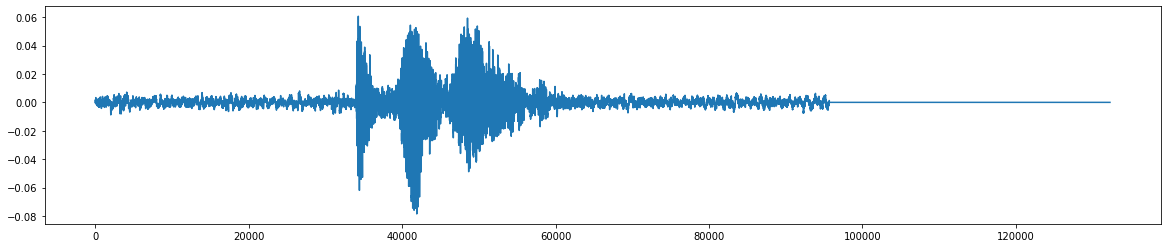

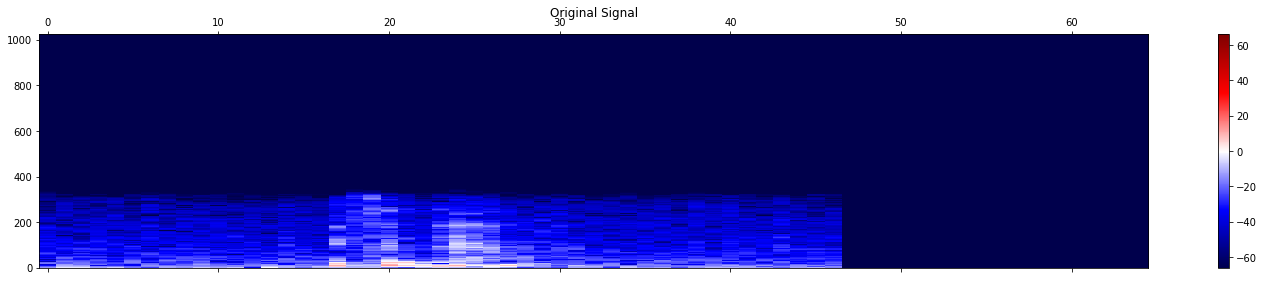

In [128]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(truncated_wav_vector)
print(truncated_wav_vector.shape)


orig_sig = _stft(truncated_wav_vector, n_fft=2048, hop_length=2048, win_length=512)
orig_sig_db = _amp_to_db(np.abs(orig_sig))
plot_spectrogram(orig_sig_db, title="Original Signal")


In [129]:
IPython.display.Audio(data=truncated_wav_vector, rate=sr)


[[6.5475772e-04 2.4193394e-06 2.4728838e-06 1.5321391e-05 6.2735107e-06
  1.7401766e-05 1.9946692e-05 1.0425656e-05 1.5770878e-05 5.6091312e-06
  1.2398932e-05 6.0914076e-06 2.5425818e-05 1.4434410e-06 8.8637444e-06
  1.6968594e-05 6.6513430e-06 2.1696732e-07 7.7346476e-06 7.8548974e-06
  1.7786437e-07 2.8226435e-07 6.1626474e-07 6.6079036e-07 5.0441639e-07
  1.6268599e-06 1.4300036e-06 4.3682326e-07 3.5372525e-06 9.8387491e-06
  2.9279608e-05 6.6528214e-06 9.4881325e-06 1.6554553e-05 5.8202527e-06
  1.5654752e-05 1.2660148e-05 2.7177570e-05 1.6544256e-05 8.1982425e-06
  1.0028350e-05 1.1603249e-05 1.4775286e-05 2.8216693e-05 1.1172414e-05
  1.0467612e-05 1.9644003e-05 1.0000007e+00 1.0000007e+00 1.0000007e+00
  1.0000007e+00 1.0000007e+00 1.0000007e+00 1.0000007e+00 1.0000007e+00
  1.0000007e+00 1.0000007e+00 1.0000007e+00 1.0000007e+00 1.0000007e+00
  1.0000007e+00 1.0000007e+00 1.0000007e+00 1.0000007e+00 1.0000007e+00]]


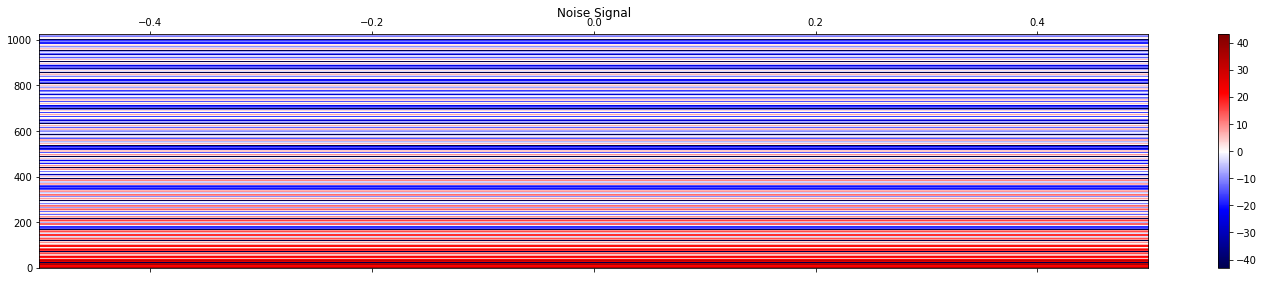

In [135]:
flatness = librosa.feature.spectral_flatness(y=truncated_wav_vector,n_fft=2048, hop_length=2048, win_length=512)
print(flatness)
flatness = flatness.reshape(65,)
noise_sig = _stft(flatness, n_fft=2048, hop_length=2048, win_length=512)
noise_sig_db = _amp_to_db(np.abs(noise_sig))
plot_spectrogram(noise_sig_db, title="Noise Signal")


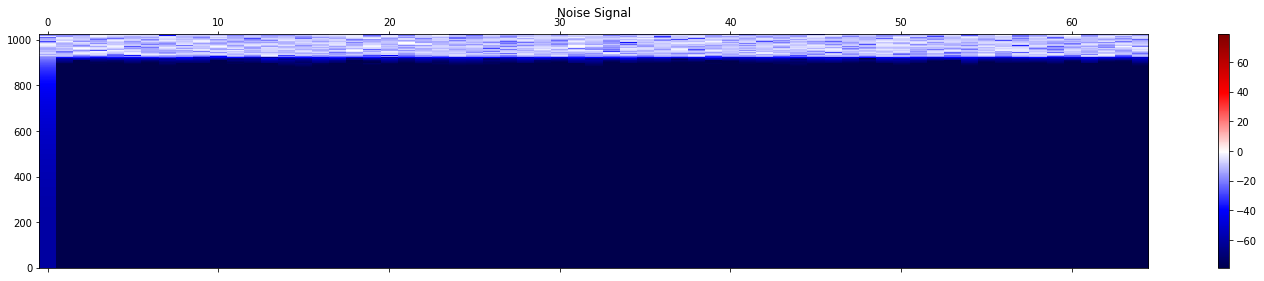

In [166]:
#ADD NOISE
noise_len = 3 # seconds
noise = band_limited_noise(min_freq=20000, max_freq = 120000, samples=len(truncated_wav_vector), samplerate=sr)*10
noise_clip = noise[:sr*noise_len]
audio_clip_band_limited = truncated_wav_vector+(1*noise)

noise_sig = _stft(noise_clip, n_fft=2048, hop_length=2048, win_length=512)
noise_sig_db = _amp_to_db(np.abs(noise_sig))
plot_spectrogram(noise_sig_db, title="Noise Signal")
flatness = librosa.feature.spectral_flatness(y=y)

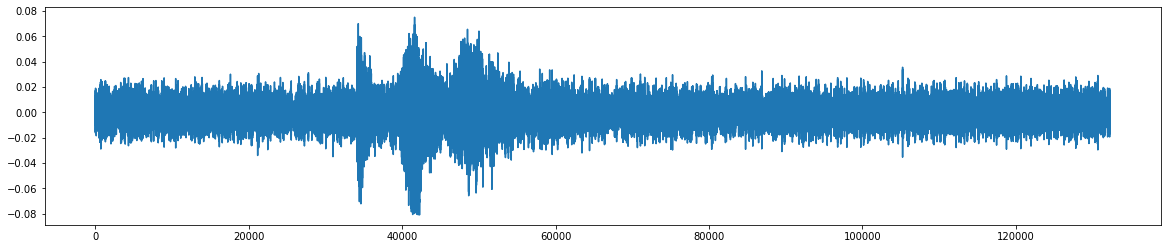

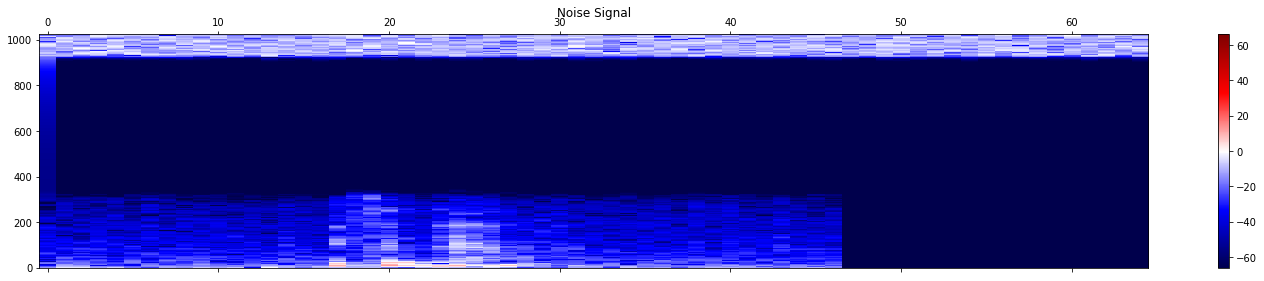

In [167]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(audio_clip_band_limited)
IPython.display.Audio(data=audio_clip_band_limited, rate=sr)

a_noise_sig = _stft(audio_clip_band_limited, n_fft=2048, hop_length=2048, win_length=512)
a_noise_sig_db = _amp_to_db(np.abs(a_noise_sig))
plot_spectrogram(a_noise_sig_db, title="Noise Signal")

STFT on noise: 0:00:00.019784
STFT on signal: 0:00:00.021225
[-69.527016 -69.527016 -69.527    ...   6.284567   6.163572  11.851005] -54.972298
Masking: 0:00:00.016327
Mask convolution: 0:00:00.019145
Mask application: 0:00:00.028783
Signal recovery: 0:00:00.031934


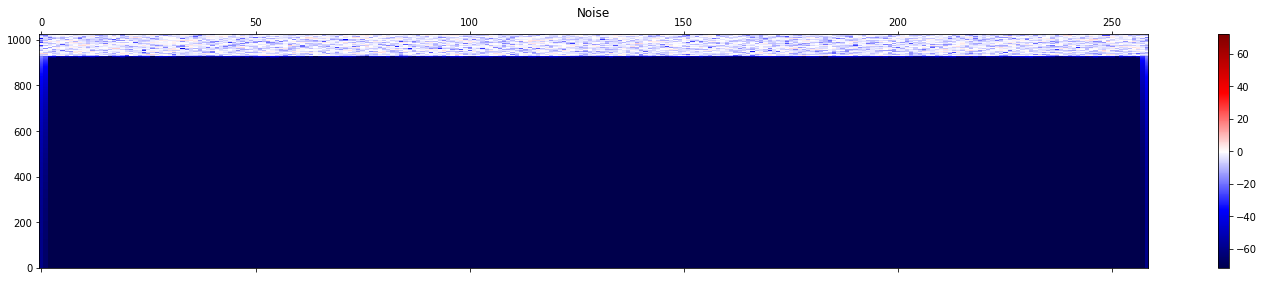

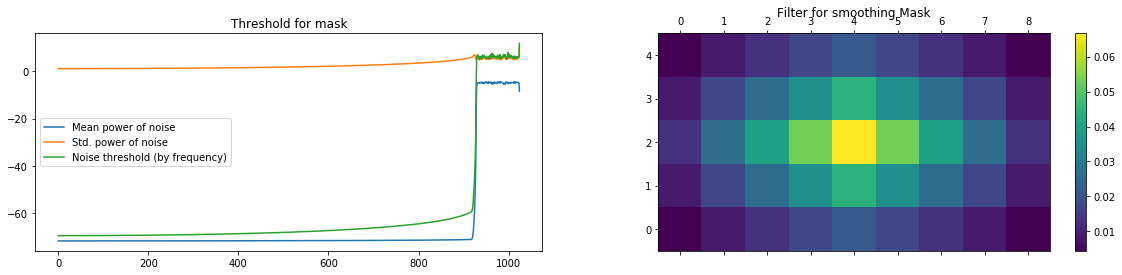

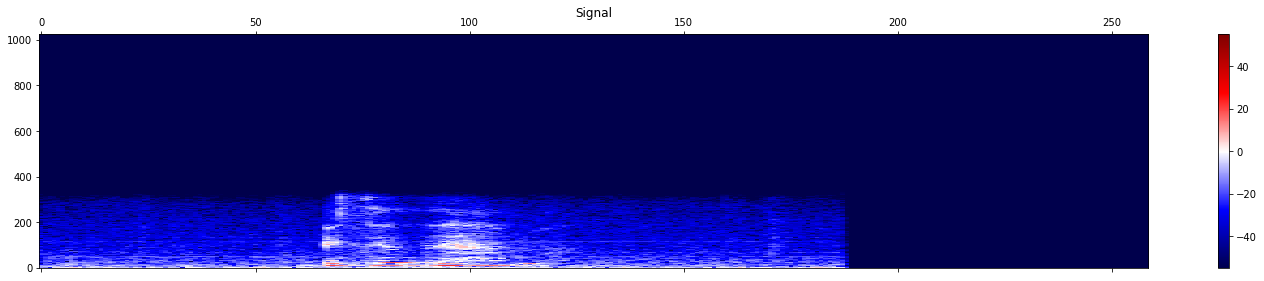

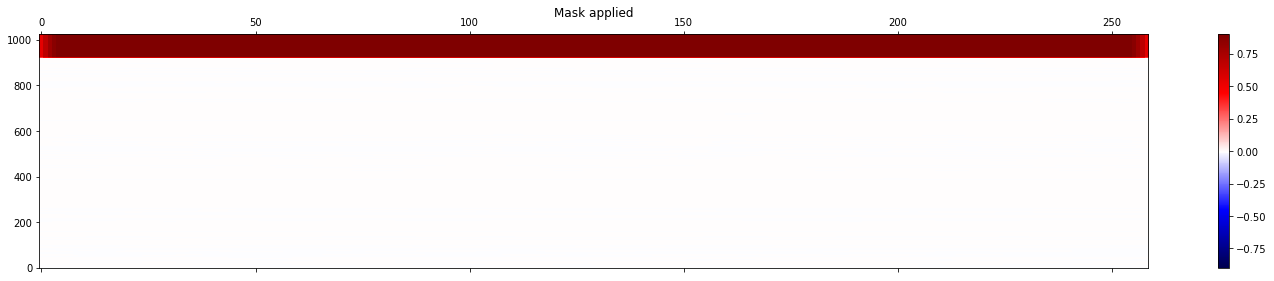

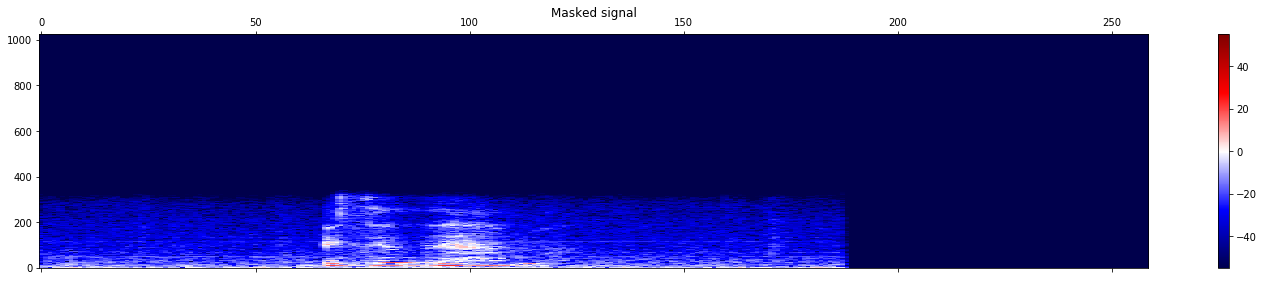

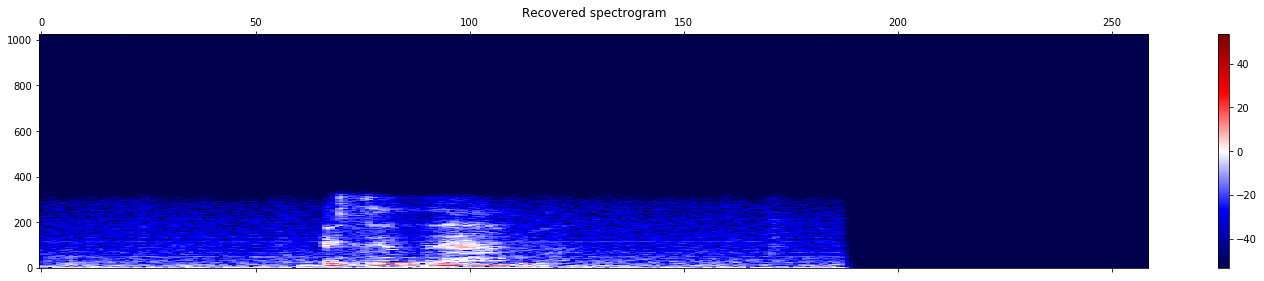

In [168]:
#output, m_sig, ms = removeNoise(audio_clip=audio_clip_band_limited, noise_clip=noise_clip,    n_std_thresh=2,prop_decrease=0.9,verbose=True,visual=True)

output, m_sig, ms = removeNoise(audio_clip=truncated_wav_vector, noise_clip=noise_clip,    n_std_thresh=2,prop_decrease=0.9,verbose=True,visual=True)


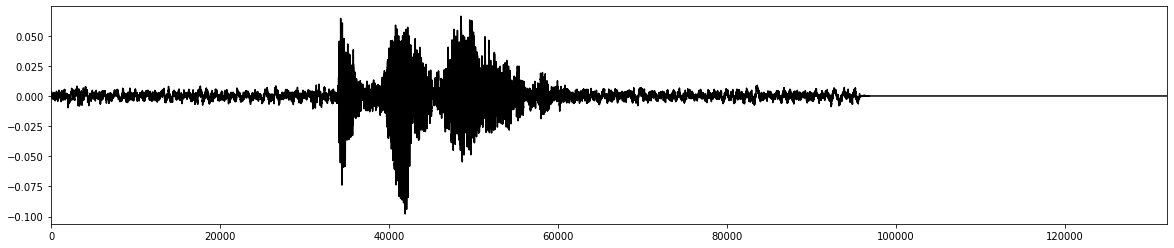

In [169]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20,4))
plt.plot(output, color='black')
ax.set_xlim((0, len(output)))
plt.show()
# play back a sample of the song
IPython.display.Audio(data=output, rate=sr)

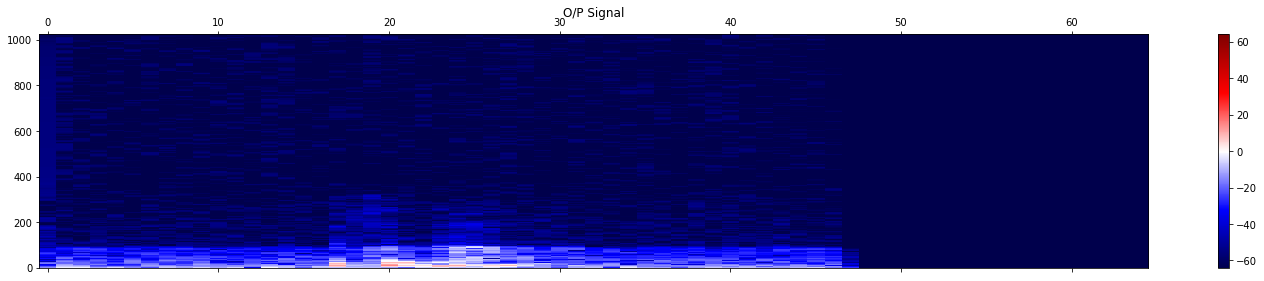

In [165]:
a_noise_sig = _stft(output, n_fft=2048, hop_length=2048, win_length=512)
a_noise_sig_db = _amp_to_db(np.abs(a_noise_sig))
plot_spectrogram(a_noise_sig_db, title="O/P Signal")

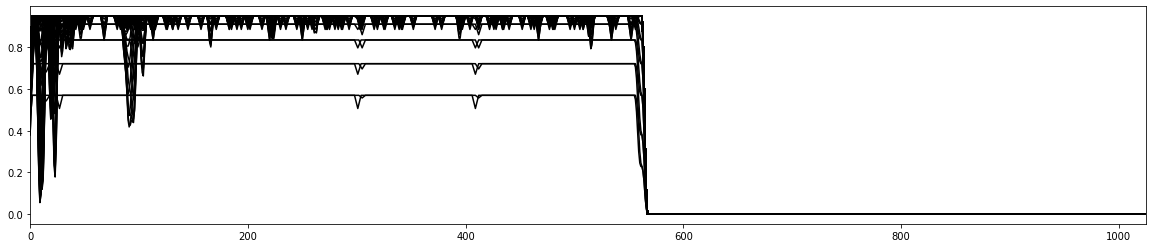

In [154]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20,4))
plt.plot(ms, color='black')
ax.set_xlim((0, len(ms)))
plt.show()
# play back a sample of the song
IPython.display.Audio(data=ms, rate=sr)

In [ ]:
sr = 44100
audio_vectors = {}
import pdb
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import time

for sess in [1]:  # using one session due to memory constraint, can replace [5] with range(1, 6)
    wav_file_path = '{}/Session{}/dialog/wav/'.format(iemocap_dir, sess)
    #pdb.set_trace()
    orig_wav_files = os.listdir(wav_file_path)
    for orig_wav_file in tqdm(orig_wav_files):
        #print("Wav file is ", orig_wav_file)
        x = re.search("^Ses.*", orig_wav_file)
        if x == None:
            #print("Skiping file", orig_wav_file)
            continue
        try:
            orig_wav_vector, _sr = librosa.load(wav_file_path + orig_wav_file, sr=sr)
            orig_wav_file, file_format = orig_wav_file.split('.')
            print("Working on file - ", orig_wav_file)
            #pdb.set_trace()
            for index, row in labels_df[labels_df['wav_file'].str.contains(orig_wav_file)].iterrows():
                #pdb.set_trace()
                #print("Inside for loop")
                #orig_wav_vector, _sr = librosa.load(wav_file_path + orig_wav_file, sr=sr)
                #orig_wav_file, file_format = orig_wav_file.split('.')
                start_time, end_time, truncated_wav_file_name, emotion, val, act, dom = row['start_time'], row['end_time'], row['wav_file'], row['emotion'], row['val'], row['act'], row['dom']
                start_frame = math.floor(start_time * sr)
                end_frame = math.floor(end_time * sr)
                truncated_wav_vector = orig_wav_vector[start_frame:end_frame + 1]
                pdb.set_trace()
                
                X = librosa.stft(truncated_wav_vector)
                Xdb = librosa.amplitude_to_db(abs(X))
                plt.figure(figsize=(14, 5))
                #plt.figure()
                librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
                plt.colorbar()
                
                #pdb.set_trace()
                imf = "/images/session{}/".format(sess)
                plt.savefig(iemocap_pre_processed_data_path + imf + str(emotion) +"_"+ str(val) +"_"+ str(act) +"_"+ str(dom) + '.png')
                plt.close('all')
                time.sleep(1)
                ###############
                #window_size = 1024
                #window = np.hanning(window_size)
                #stft  = librosa.core.spectrum.stft(truncated_wav_vector, n_fft=window_size, hop_length=512, window=window)
                #out = 2 * np.abs(stft) / np.sum(window)
                #fig = plt.Figure()
                #canvas = FigureCanvas(fig)
                #ax = fig.add_subplot(111)
                #p = librosa.display.specshow(librosa.amplitude_to_db(out, ref=np.max), ax=ax, y_axis='log', x_axis='time')
                #fig.savefig('spec11.png')

                ###############
                audio_vectors[truncated_wav_file_name] = truncated_wav_vector
                
        except:
            print('An exception occured for {}'.format(orig_wav_file))
    with open(iemocap_pre_processed_data_path + '/audio_vectors_{}.pkl'.format(sess), 'wb') as f:
        pickle.dump(audio_vectors, f)

  0%|          | 0/56 [00:00<?, ?it/s]

Working on file -  Ses01F_script03_1
> <ipython-input-23-fc9ee20f067d>(34)<module>()
-> X = librosa.stft(truncated_wav_vector)
(Pdb) wav_file_path + orig_wav_file
'/home/mandeep_stanford/cs231n_project/IEMOCAP_full_release//Session1/dialog/wav/Ses01F_script03_1'
(Pdb) start_time 
5.53
(Pdb) end_time
7.7


In [ ]:
wav_file = ""/home/mandeep_stanford/cs231n_project/IEMOCAP_full_release//Session1/dialog/wav/Ses01F_script03_1.wav"
start_time = 5.53
end_time = 7.7
start_frame = math.floor(start_time * sr)
end_frame = math.floor(end_time * sr)
truncated_wav_vector = orig_wav_vector[start_frame:end_frame + 1]

In [ ]:
start_time = 5.53
end_time = 7.7
start_frame = math.floor(start_time * sr)
end_frame = math.floor(end_time * sr)


In [162]:
print("hello")

hello


In [7]:
import numpy
numpy.int(1.99)

1

In [8]:
range(2)

range(0, 2)

In [9]:
for i in range(2):
    print(i)

0
1
